# 911 Calls Capstone

1. Introduction:
911 is an emergency telephone number for the North American Numbering Plan (NANP). Analysing emergency calls dataset and discovering hidden trends and patterns will help in ensuring that the emergency response team is better equipped to deal with emergencies.
The dataset contains Emergency 911 calls in Montgomery County located in the Commonwealth of Pennsylvania. The attributes chosen include: type of emergency, time stamp, township where the emergency has occurred.

2. The data contains the following fields:
lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

# Data and Setup

In [3]:
#Import numpy and pandas
import numpy as np
import pandas as pd
#Import visualization libraries 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [21]:
#Read in the csv file as a dataframe called df
df=pd.read_csv('911.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [23]:
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1


# Data Cleaning

1:"e" is dummy variabel=1 meand by droping column "e" the information will not change.
2:data type of the objects in the timeStamp column is string, so this change this column from strings to DateTime objects.

In [24]:
#Drop 'e'
df.drop(labels = 'e',axis=1,inplace=True)

In [25]:
#convert the column from strings to DateTime objects.
df['timeStamp']=pd.to_datetime(df['timeStamp'])

# Creating new features

In [58]:
#adding new date time columns
df['Year']=df['timeStamp'].apply(lambda time: time.year)
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)
df['Date']=df['timeStamp'].apply(lambda time:time.date())

In [42]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [43]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

# Data Visualizing and Analysing

Text(0.5, 1.0, 'Calls Reason')

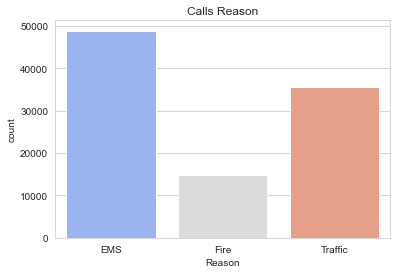

In [47]:
#911 calls by Reason
sns.countplot(x='Reason',data=df,palette='coolwarm')
plt.title('Calls Reason')

Text(0.5, 1.0, 'Day of the Week Calls by Reason')

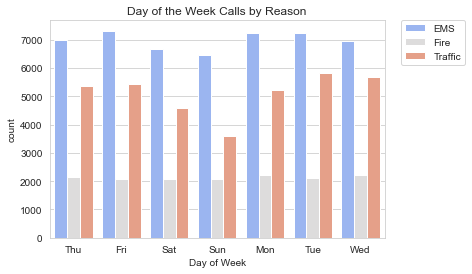

In [49]:
#the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Day of the Week Calls by Reason')

Text(0.5, 1.0, 'Month Calls by Reason')

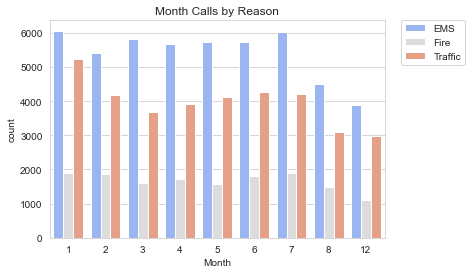

In [50]:
#Month column with the hue based off of the Reason column.
sns.countplot(x='Month',data=df,hue='Reason',palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Month Calls by Reason')

In [51]:
#create a gropuby object called byMonth
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Year,Hour,Day of Week,Date,Reason
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


Text(0.5, 1.0, 'Calls per Month')

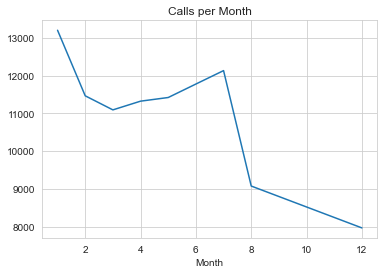

In [52]:
# the count of calls per month
byMonth['twp'].plot()
plt.title('Calls per Month')

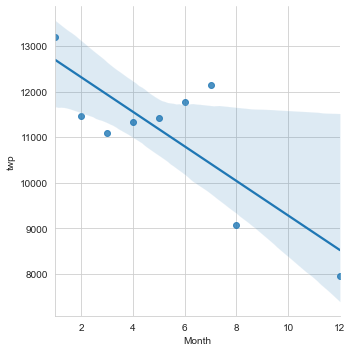

In [53]:
#linear fit on the number of calls per month
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

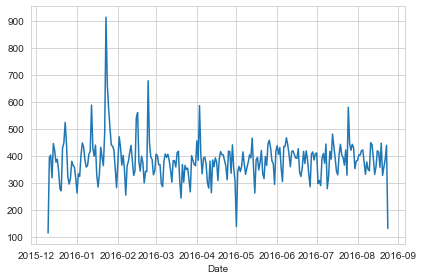

In [60]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

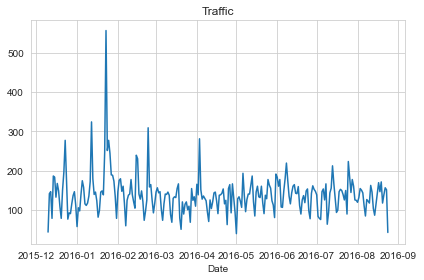

In [61]:
# Traffic Reason for the 911 call
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

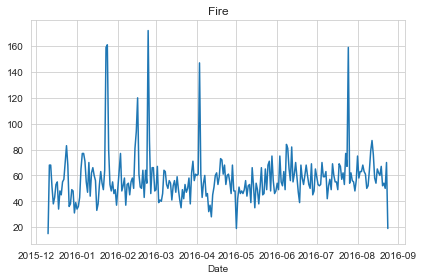

In [62]:
# Fire Reason for the 911 call
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

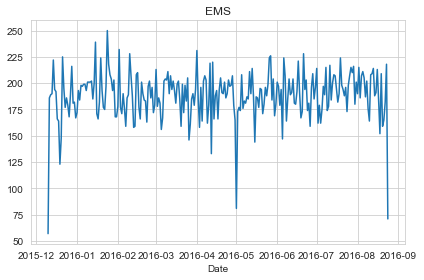

In [63]:
## EMS Reason for the 911 call
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

 restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [64]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
1,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
2,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
3,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
4,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474


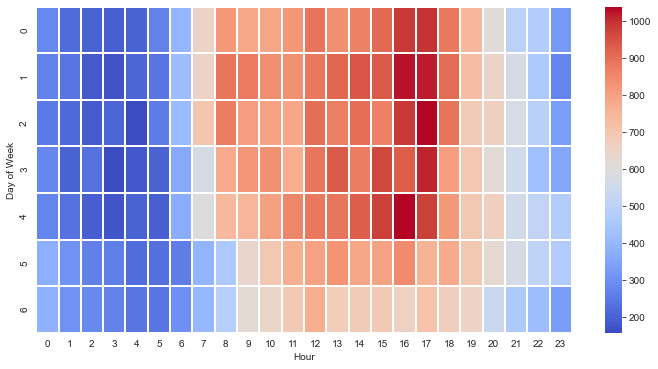

In [73]:
#HeatMap
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm',lw=1)

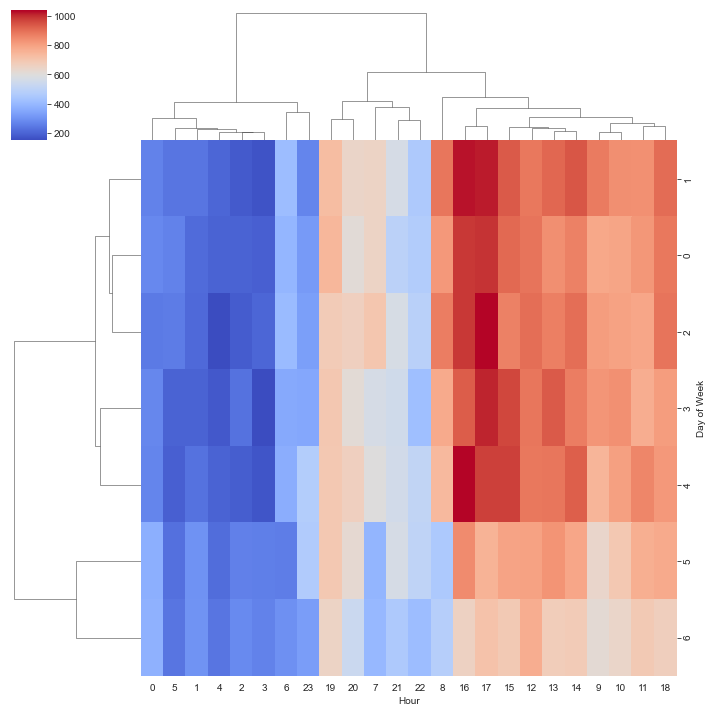

In [71]:
#clustermap
sns.clustermap(dayHour,cmap='coolwarm')

the Month as the column.

In [67]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
0,1727,1964,1535,1598,1779,1617,1692,1511,1257
1,1973,1753,1884,1430,1918,1676,1670,1612,1234
2,1700,1903,1889,1517,1538,2058,1717,1295,1262
3,1584,1596,1900,1601,1590,2065,1646,1230,1266
4,1970,1581,1525,1958,1730,1649,2045,1310,1065


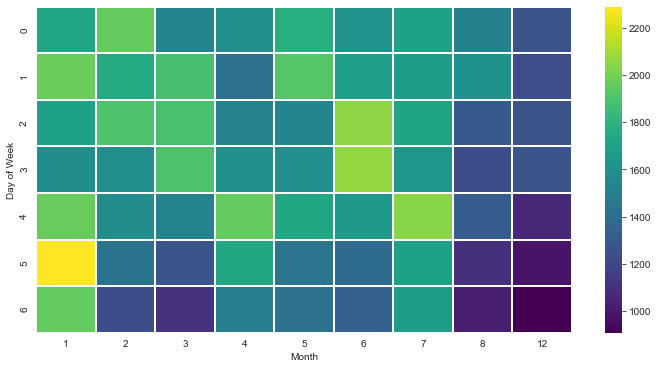

In [74]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis',lw=1)

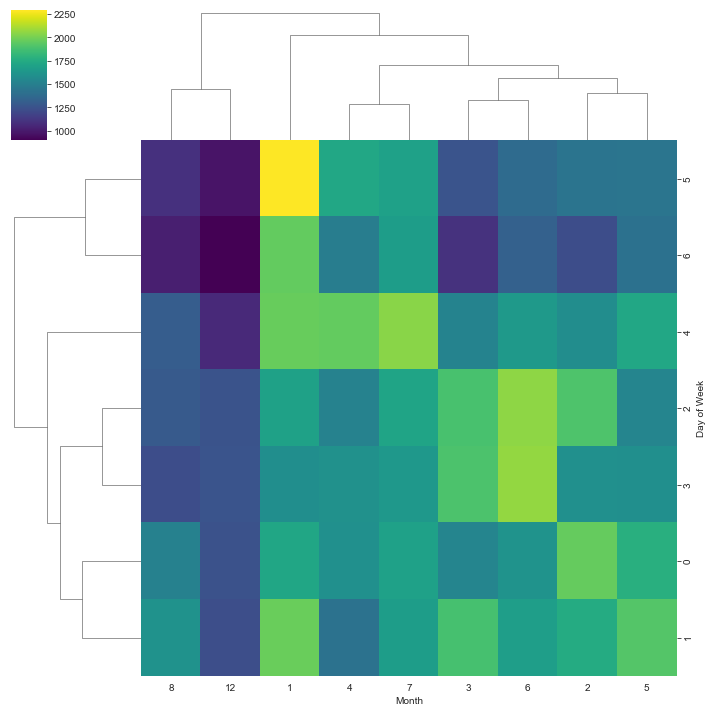

In [69]:
sns.clustermap(dayMonth,cmap='viridis')